# K-Mean Clustering

In [18]:
from sklearn.datasets import load_iris
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
data_raw = load_iris()
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
data['target'] =  data_raw.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Petal Length vs Petal Width')

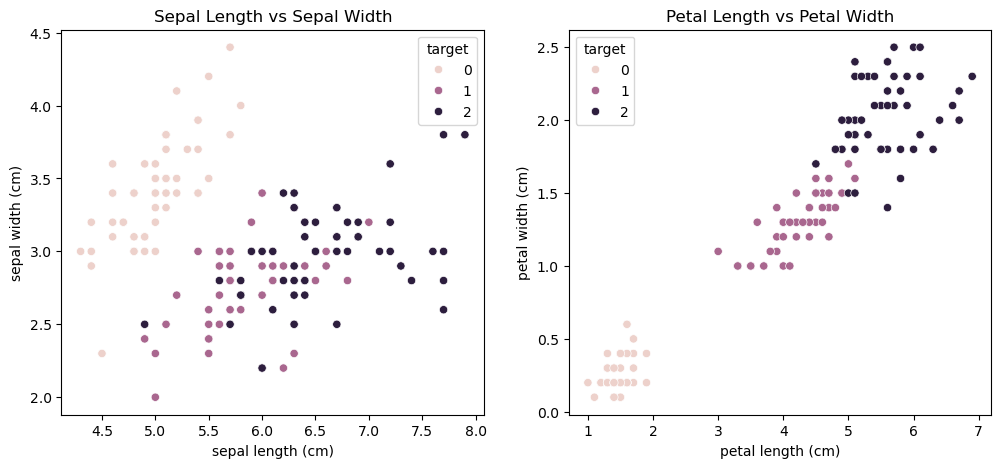

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x = data['sepal length (cm)'], y= data['sepal width (cm)'], hue = data['target'])
plt.title("Sepal Length vs Sepal Width")
plt.subplot(1,2,2)
sns.scatterplot(x = data['petal length (cm)'], y= data['petal width (cm)'], hue = data['target'])
plt.title("Petal Length vs Petal Width")

We can see that `Petal Length` vs `Petal Width` will create clusters that are more distinct.

In [9]:
X = data.drop('target', axis=1)
Y = data['target']

c:\Users\Abdullah\miniconda3\envs\MLenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Sepal Length vs Sepal Width -- Predicted')

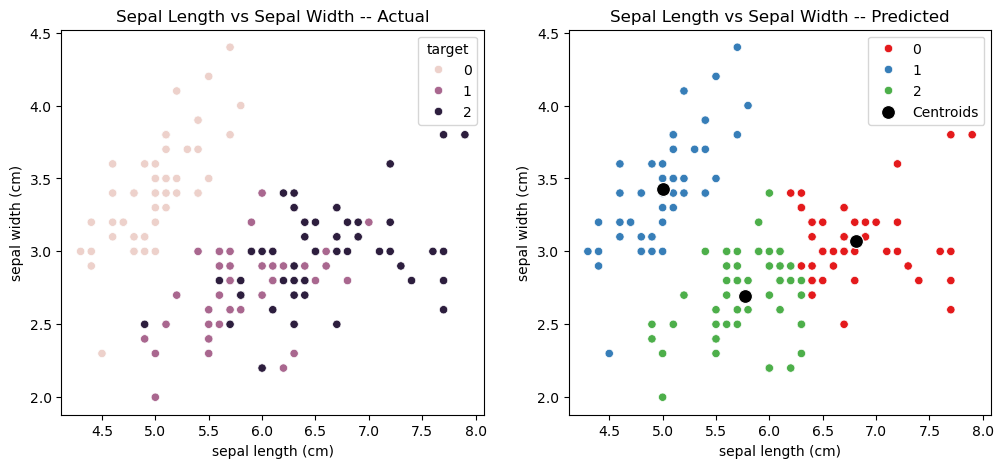

In [16]:
from sklearn.cluster import KMeans
k = 3
kmean = KMeans(n_clusters=k)
y_pred = kmean.fit_predict(X[['sepal length (cm)', 'sepal width (cm)']])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x = data['sepal length (cm)'], y= data['sepal width (cm)'], hue = data['target'])
plt.title("Sepal Length vs Sepal Width -- Actual")
plt.subplot(1,2,2)
sns.scatterplot(x = X['sepal length (cm)'], y= X['sepal width (cm)'], hue = y_pred, palette='Set1')
sns.scatterplot(x = kmean.cluster_centers_[:,0], y= kmean.cluster_centers_[:,1], color='black', s=100, label='Centroids')
plt.title("Sepal Length vs Sepal Width -- Predicted")

c:\Users\Abdullah\miniconda3\envs\MLenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Petal Length vs Petal Width -- Predicted')

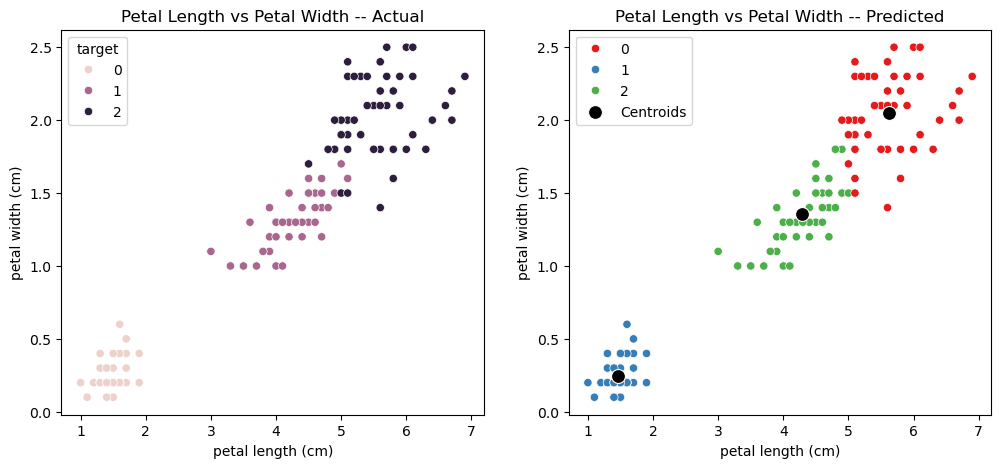

In [17]:
k = 3
kmean = KMeans(n_clusters=k)
y_pred = kmean.fit_predict(X[['petal length (cm)', 'petal width (cm)']])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x = data['petal length (cm)'], y= data['petal width (cm)'], hue = data['target'])
plt.title("Petal Length vs Petal Width -- Actual")
plt.subplot(1,2,2)
sns.scatterplot(x = X['petal length (cm)'], y= X['petal width (cm)'], hue = y_pred, palette='Set1')
sns.scatterplot(x = kmean.cluster_centers_[:,0], y= kmean.cluster_centers_[:,1], color='black', s=100, label='Centroids')
plt.title("Petal Length vs Petal Width -- Predicted")

Text(0.5, 1.0, 'Silhouette Score vs K')

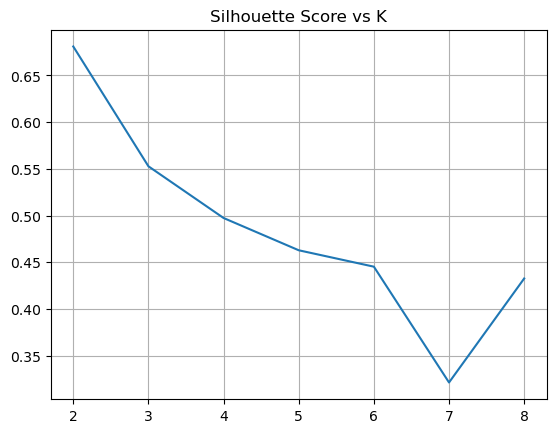

In [27]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []
for item in k: 
    kmean = KMeans(n_clusters = item)
    y_pred = kmean.fit_predict(X)
    score = silhouette_score(X, y_pred)
    scores.append(score)

plt.plot(k, scores)
plt.grid()
plt.title("Silhouette Score vs K")



We can see that either `2` or `3` clusters are optimal.

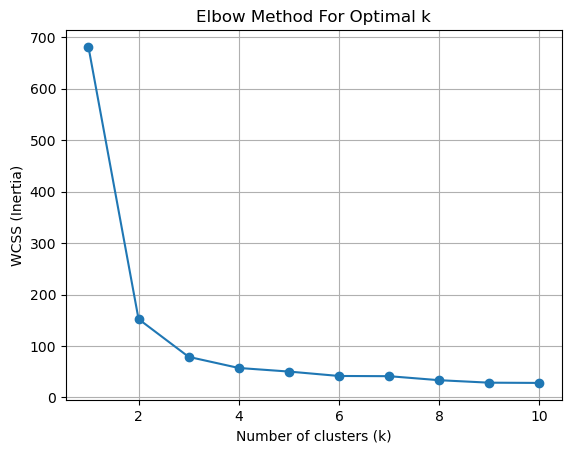

In [25]:
# Elbow method to find optimal number of clusters
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()


`3` clusters are the optimal no. of clusters.

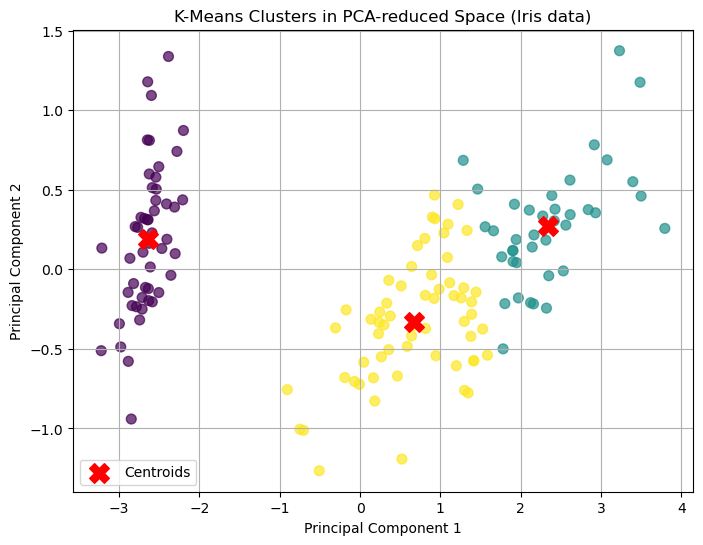

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

# Plot the clusters in PCA-reduced space
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters in PCA-reduced Space (Iris data)')

# Optionally, plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.legend()
plt.grid()
plt.show()


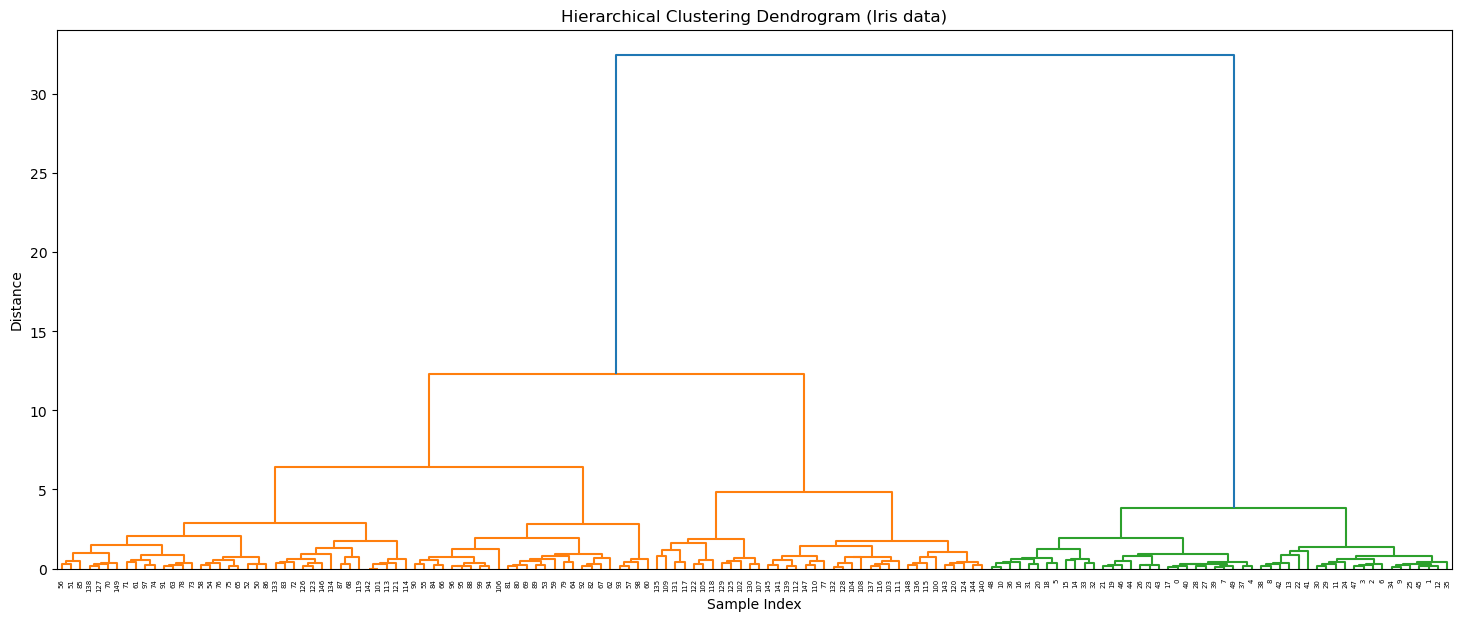

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering on the feature data
linked = linkage(X, method='ward')

plt.figure(figsize=(18, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           color_threshold=None)
plt.title('Hierarchical Clustering Dendrogram (Iris data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


## **Comparison of K-Means and Agglomerative Hierarchical Clustering on the Iris Dataset**

**K-Means Clustering:**
- *Performance:* K-Means clustering, using the elbow method, indicated 3 as the optimal number of clusters, which aligns with the actual number of species in the Iris dataset. The resulting cluster assignments generally correspond well with the true species labels, particularly for clusters with clear separation in feature space (e.g., setosa).
- *Strengths:*
    - Efficient and fast to compute, especially with larger datasets.
    - Effective when clusters are globular and of similar size.
    - Easy to interpret and visualize with clear cluster centers.
- *Weaknesses:*
    - Sensitive to initial centroid placement (can get stuck in local minima).
    - Not well-suited for clusters with non-spherical shapes or varying densities/sizes.
    - Requires the number of clusters to be specified in advance.

**Agglomerative Hierarchical Clustering:**
- *Performance:* The dendrogram produced by hierarchical clustering also reveals three natural clusters in the Iris data. This method does not require the number of clusters to be specified at the outset and provides a complete hierarchy of cluster merges. Visual inspection of the dendrogram suggests strong agreement with species divisions, especially for setosa, though there may be more mixing between versicolor and virginica.
- *Strengths:*
    - No need to pre-specify the number of clusters; the dendrogram can be cut at different levels for different granularities.
    - Capable of capturing nested, non-globular, and irregular cluster structures.
    - Useful for visual exploration of clustering tendency and data relationships.
- *Weaknesses:*
    - Computationally intensive for large datasets (does not scale as well as K-Means).
    - Sensitive to outliers and the choice of linkage/metric.
    - Lacks cluster centroids for easy summarization or prediction on new data.

**Conclusion:**  
Both methods are effective at uncovering the underlying 3-class structure of the Iris dataset. K-Means is preferable for quick, efficient clustering when the number of well-separated clusters is known, while Agglomerative Hierarchical Clustering provides richer insights into the data's structure and is flexible for cases where the number or shape of clusters is uncertain. In practice, K-Means is commonly used for large, well-behaved datasets, whereas hierarchical clustering is valuable for exploratory analysis and small to medium datasets.
